In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/amazon-products-reviews-dataset/data.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [4]:
df.shape

(34660, 21)

In [6]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


<Axes: >

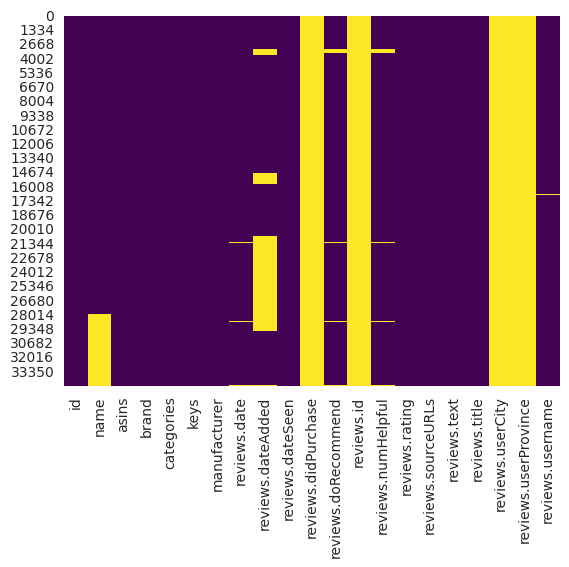

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

In [8]:
df.drop(['reviews.id'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.numHelpful    34131 non-null  float64
 13  reviews.rating        34627 non-null  float64
 14  reviews.sourceURLs    34660 non-null  object 
 15  reviews.text       

In [9]:
df.drop(['reviews.didPurchase'],inplace =True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [10]:
df.describe()

,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,34131.000000,34627.000000,0.0,0.0
mean,0.630248,4.584573,NaN,NaN
std,13.215775,0.735653,NaN,NaN
min,0.000000,1.000000,NaN,NaN
25%,0.000000,4.000000,NaN,NaN
50%,0.000000,5.000000,NaN,NaN
75%,0.000000,5.000000,NaN,NaN
max,814.000000,5.000000,NaN,NaN


In [11]:
# making a copy for eda where we can drop strings and work on numerical values only
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.doRecommend   34066 non-null  object 
 11  reviews.numHelpful    34131 non-null  float64
 12  reviews.rating        34627 non-null  float64
 13  reviews.sourceURLs    34660 non-null  object 
 14  reviews.text          34659 non-null  object 
 15  reviews.title      

In [12]:
print(data['asins'].unique())
asins_unique=len(data['asins'].unique())
print("Number of Unique asins: "+str(asins_unique))

['B01AHB9CN2' 'B00VINDBJK' 'B005PB2T0S' 'B002Y27P3M' 'B01AHB9CYG'
 'B01AHB9C1E' 'B01J2G4VBG' 'B00ZV9PXP2' 'B0083Q04TA' 'B018Y229OU'
 'B00REQKWGA' 'B00IOYAM4I' 'B018T075DC' nan 'B00DU15MU4' 'B018Y225IA'
 'B005PB2T2Q' 'B018Y23MNM' 'B00OQVZDJM' 'B00IOY8XWQ' 'B00LO29KXQ'
 'B00QJDU3KY' 'B018Y22C2Y' 'B01BFIBRIE' 'B01J4ORNHU' 'B018SZT3BK'
 'B00UH4D8G2' 'B018Y22BI4' 'B00TSUGXKE' 'B00L9EPT8O,B01E6AO69U'
 'B018Y23P7K' 'B00X4WHP5E' 'B00QFQRELG' 'B00LW9XOJM' 'B00QL1ZN3G'
 'B0189XYY0Q' 'B01BH83OOM' 'B00BFJAHF8' 'B00U3FPN4U' 'B002Y27P6Y'
 'B006GWO5NE' 'B006GWO5WK']
Number of Unique asins: 42


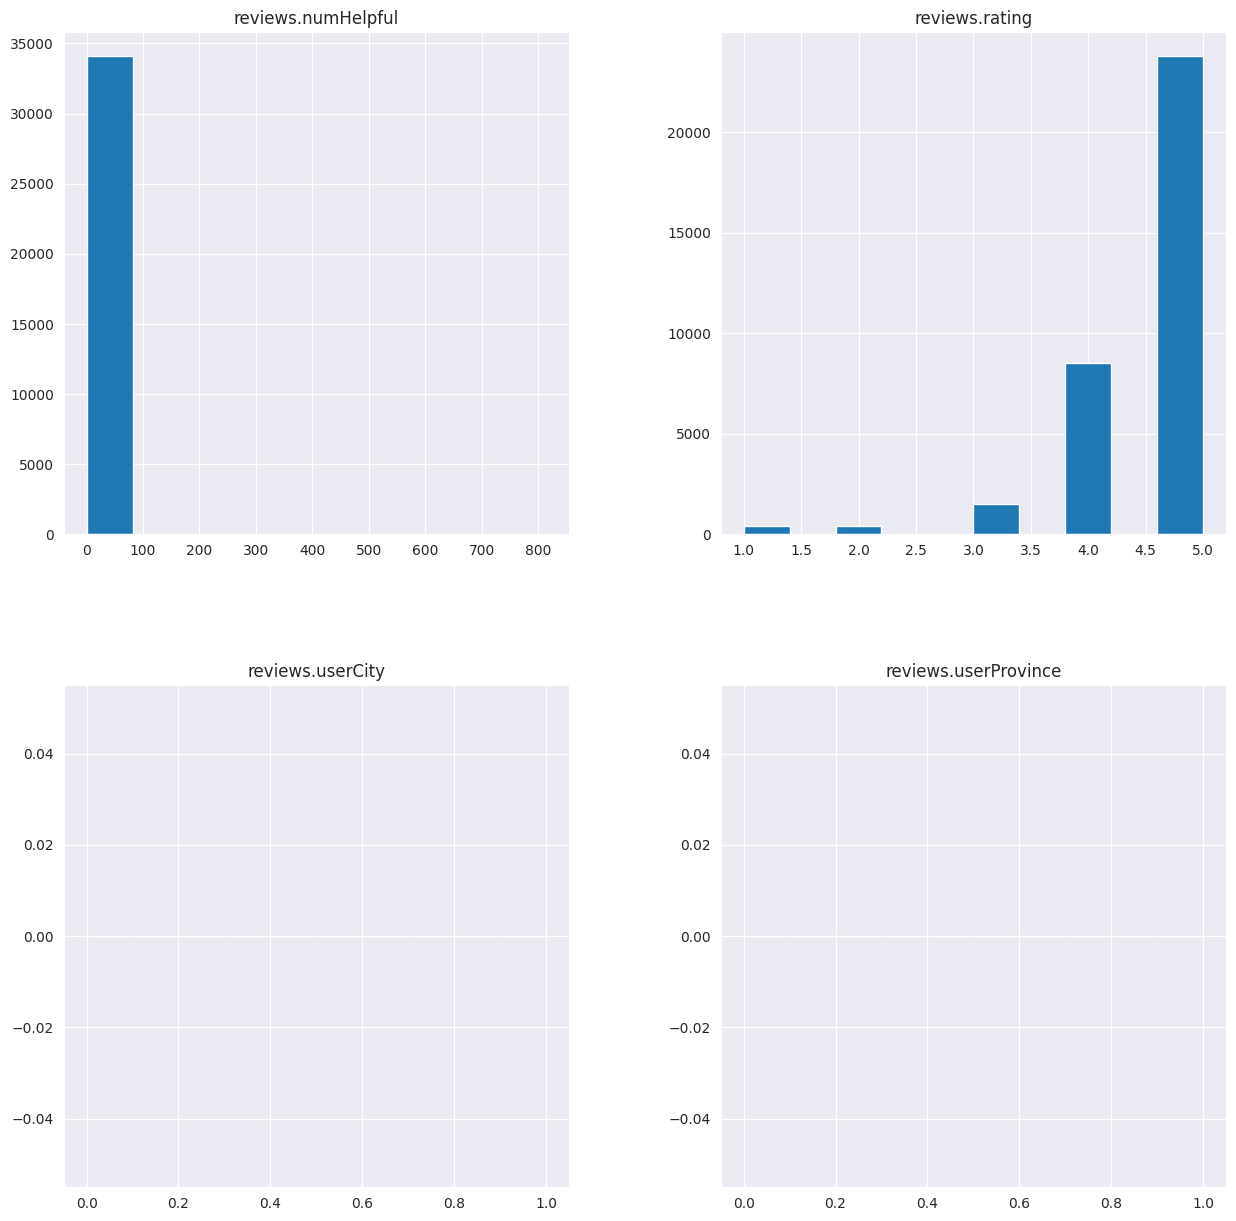

In [13]:
data.hist(figsize=(15,15))
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
# now removing all null values from review.rating
data_after=data.dropna(subset=['reviews.rating'])
print("After {}".format(len(data_after)))
data_after['reviews.rating']=data_after['reviews.rating'].astype(int)

Before 34660
After 34627


In [15]:
split=StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_index,test_index in split.split(data_after,data_after["reviews.rating"]):
    strat_train=data_after.reindex(train_index)
    strat_test=data_after.reindex(test_index)
strat_train.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
18713,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-05-27T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:37.663Z,2017-08-02T19:52:08.4...",True,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,I replaced an older Kindle with a new paper wh...,BIG IMPROVEMENT!,NaN,NaN,JLinFL
30396,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-09-02T00:00:00.000Z,2017-09-20T05:35:59Z,"2017-08-25T22:40:08.436Z,2017-08-19T09:35:45.3...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,I love the ability to connect to the Internet ...,A Nice Upgrade,NaN,NaN,Tremelle
22522,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-01T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,I love the Echo Alexa is great the features ma...,Alexa is the best,NaN,NaN,TNT69
30957,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-23T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:29.434Z,2017-08-19T09:26:40.0...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4370400/review...,Connected hardwire to the home network. Added ...,Cut the Cord,NaN,NaN,sonarfred
28280,AVpfl8cLLJeJML43AE3S,NaN,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2016-09-23T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,"Amazon did it again, Alexa is awesome and cont...",Awesome product!,NaN,NaN,Tan101


In [16]:
len(strat_train)

27701

In [17]:
len(strat_test)

6926

In [18]:
strat_train["reviews.rating"].value_counts()/len(strat_train)
# this is to get percentage of each of the ratings 

reviews.rating
5.0    0.686221
4.0    0.245840
3.0    0.043464
1.0    0.011913
2.0    0.011660
Name: count, dtype: float64

In [19]:
strat_test["reviews.rating"].value_counts()/len(strat_test)
# this is to get percentage of each of the ratings in testing data

reviews.rating
5.0    0.685677
4.0    0.249495
3.0    0.042304
2.0    0.011262
1.0    0.010107
Name: count, dtype: float64

In [20]:
reviews=strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
18713,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-05-27T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:37.663Z,2017-08-02T19:52:08.4...",True,0.0,5.0,http://reviews.bestbuy.com/3545/9439005/review...,I replaced an older Kindle with a new paper wh...,BIG IMPROVEMENT!,NaN,NaN,JLinFL
30396,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-09-02T00:00:00.000Z,2017-09-20T05:35:59Z,"2017-08-25T22:40:08.436Z,2017-08-19T09:35:45.3...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,I love the ability to connect to the Internet ...,A Nice Upgrade,NaN,NaN,Tremelle


In [21]:
len(reviews['name'].unique()),len(reviews['asins'].unique())

(49, 36)

In [22]:
# so its better to group by on the basis of asins
reviews.groupby('asins')['name'].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, nan, Amaz...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27701 entries, 18713 to 17515
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27676 non-null  object 
 1   name                  22255 non-null  object 
 2   asins                 27674 non-null  object 
 3   brand                 27676 non-null  object 
 4   categories            27676 non-null  object 
 5   keys                  27676 non-null  object 
 6   manufacturer          27676 non-null  object 
 7   reviews.date          27656 non-null  object 
 8   reviews.dateAdded     19186 non-null  object 
 9   reviews.dateSeen      27676 non-null  object 
 10  reviews.doRecommend   27258 non-null  object 
 11  reviews.numHelpful    27306 non-null  float64
 12  reviews.rating        27676 non-null  float64
 13  reviews.sourceURLs    27676 non-null  object 
 14  reviews.text          27675 non-null  object 
 15  reviews.title       

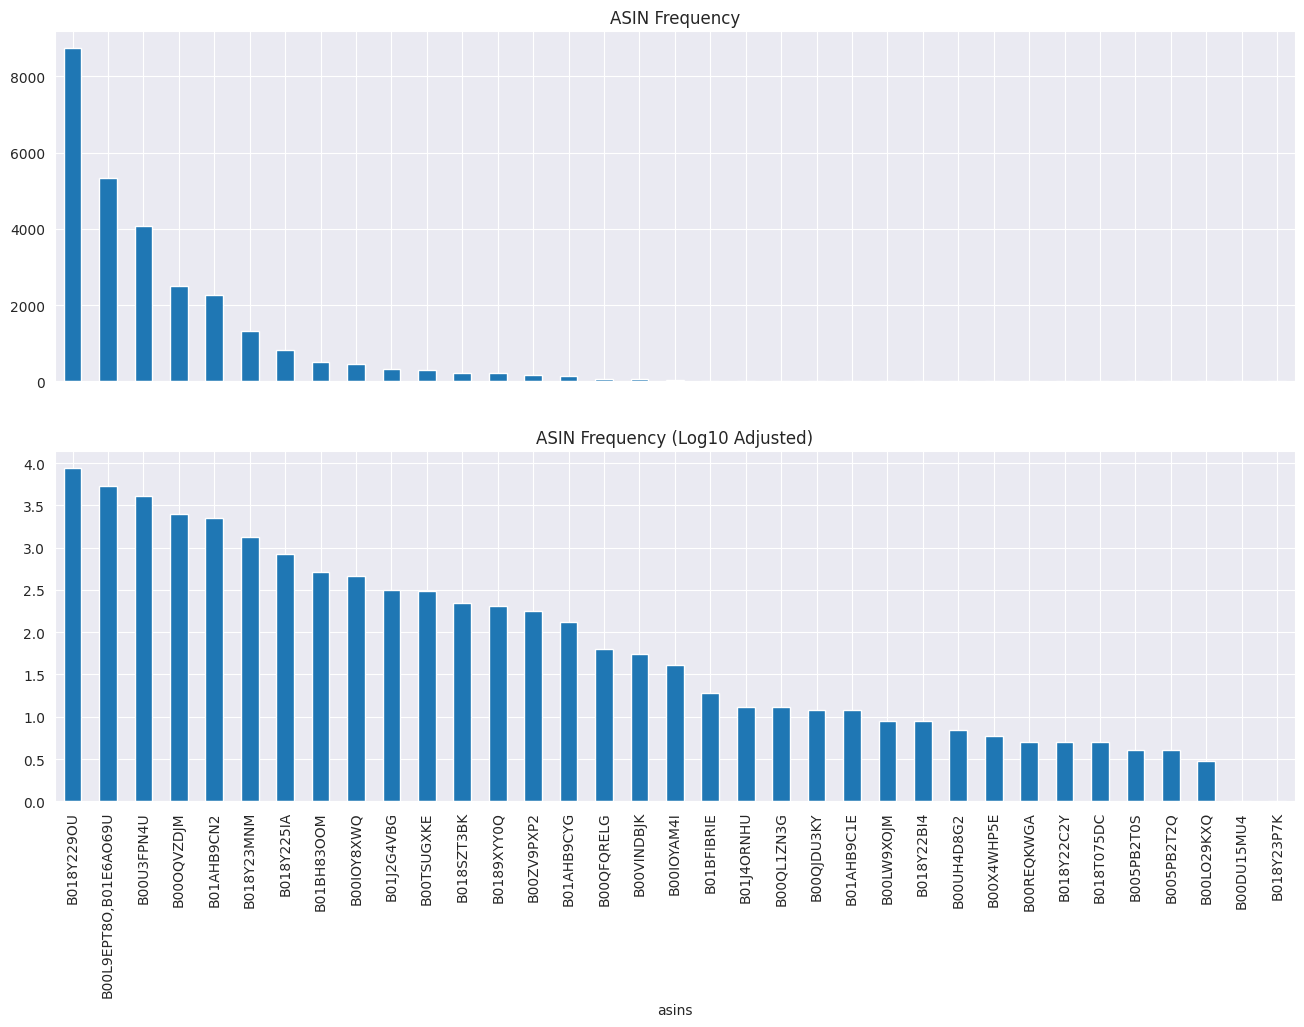

In [24]:
fig = plt.figure(figsize=(16,10))
# we use subplot when we have to see interrelationship btw two graphs
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
# The ax (or Axes object) is the area of the figure where your data appears
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, 
                                               title="ASIN Frequency (Log10 Adjusted)") 
# np.log10 normalises our data to visualise the graph and difference much better
plt.show()

In [25]:
reviews['reviews.rating'].mean()
# trianing data set rating mean

4.584224598930481

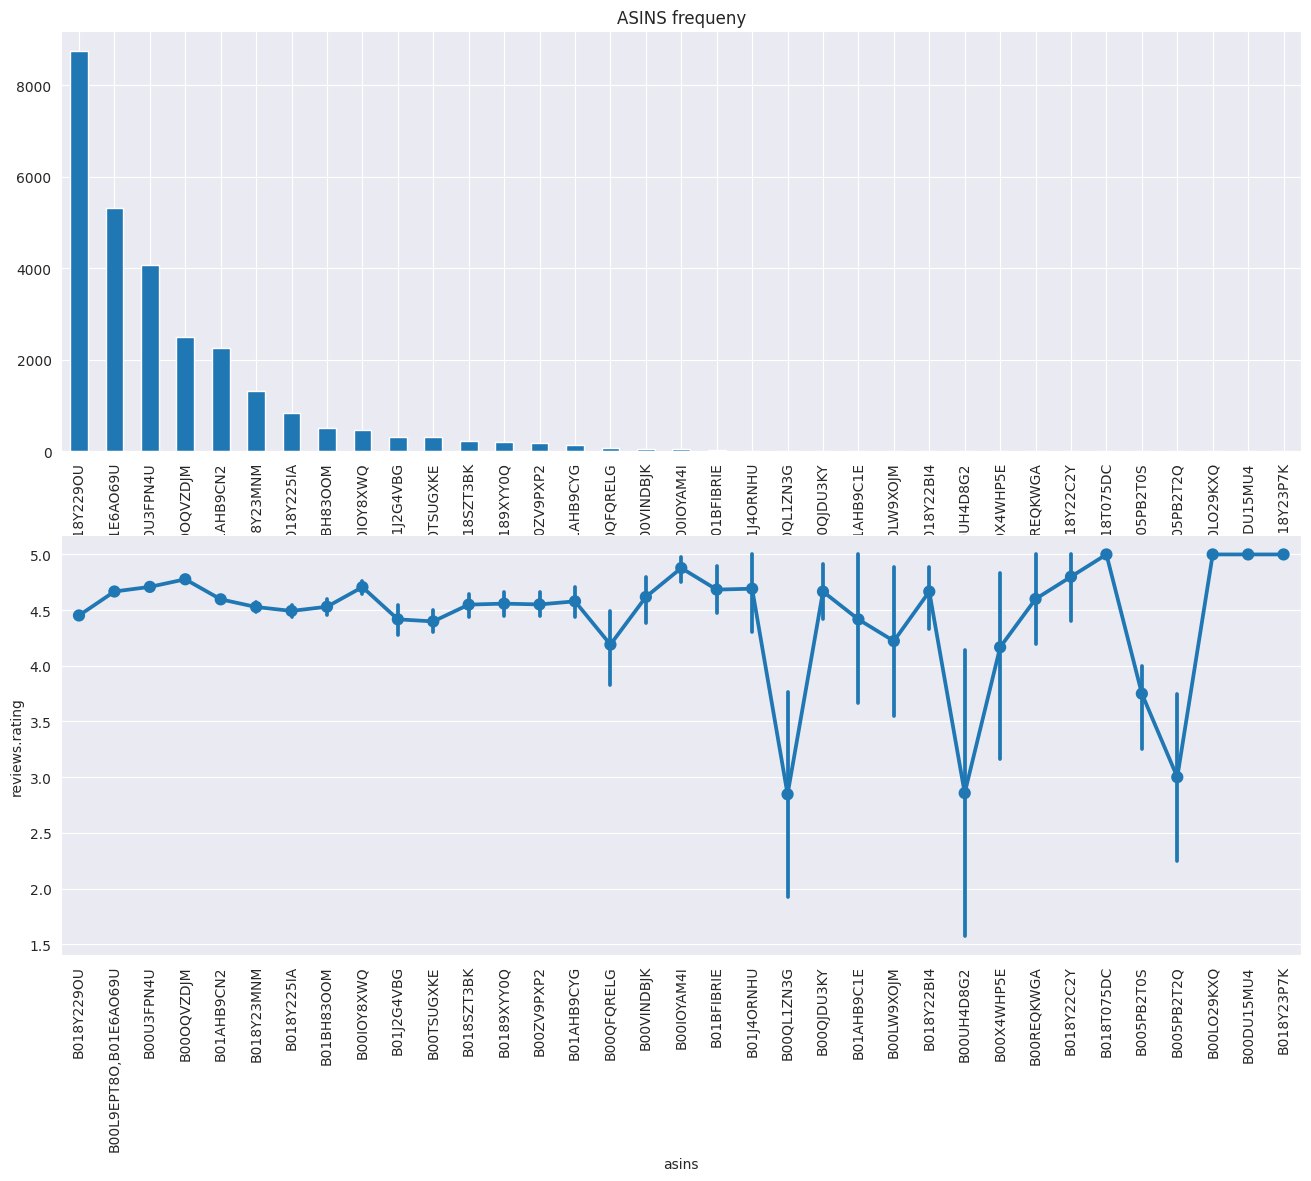

In [26]:
# now we will use pointplot to see our number of those people giving ratings
asins_count=reviews['asins'].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.rating",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

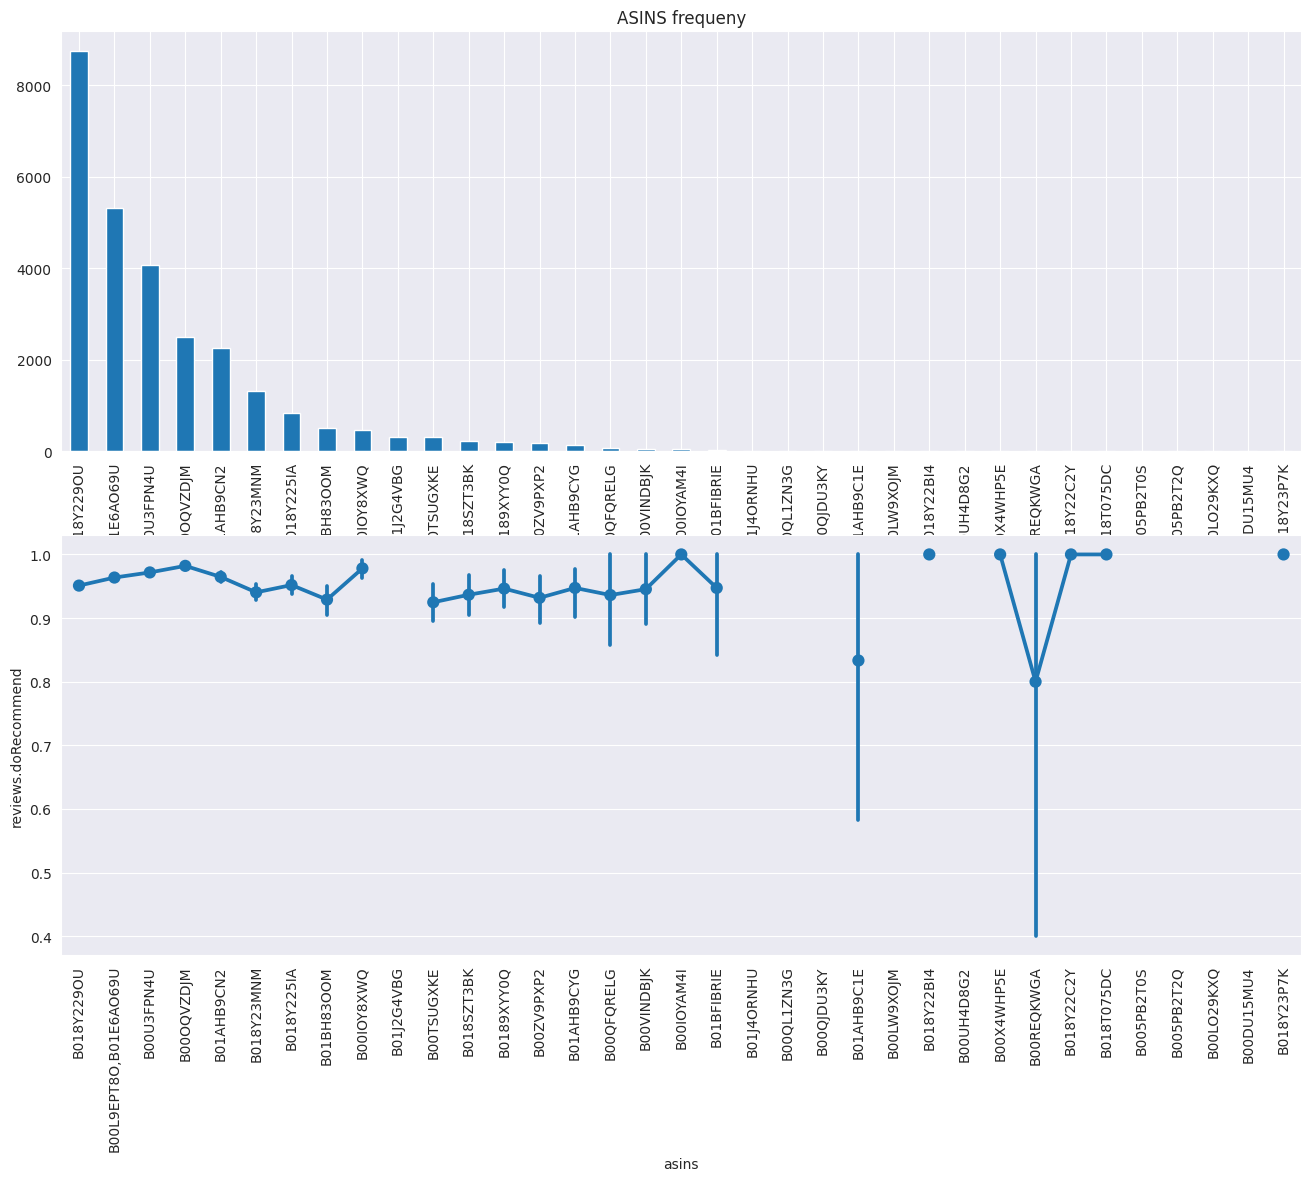

In [27]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews['asins'].value_counts().plot(kind="bar",title="ASINS frequeny")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asins_count,data=reviews)
plt.xticks(rotation=90)
plt.show()

In [47]:
#corr_matrix=reviews.corr()
#corr_matrix

In [29]:
counts=reviews['asins'].value_counts().to_frame()
avg_rating=reviews.groupby("asins")['reviews.rating'].mean().to_frame()
avg_rating

,reviews.rating
asins,
B005PB2T0S,3.750000
B005PB2T2Q,3.000000
B00DU15MU4,5.000000
B00IOY8XWQ,4.706783
B00IOYAM4I,4.878049
"B00L9EPT8O,B01E6AO69U",4.667168
B00LO29KXQ,5.000000
B00LW9XOJM,4.222222
B00OQVZDJM,4.776935


In [30]:
table=avg_rating.join(counts)
table

,reviews.rating,count
asins,,
B005PB2T0S,3.750000,4
B005PB2T2Q,3.000000,4
B00DU15MU4,5.000000,1
B00IOY8XWQ,4.706783,457
B00IOYAM4I,4.878049,41
"B00L9EPT8O,B01E6AO69U",4.667168,5324
B00LO29KXQ,5.000000,3
B00LW9XOJM,4.222222,9
B00OQVZDJM,4.776935,2506


In [46]:
#plt.scatter("asins","reviews.rating",data=table)
#table.corr()

In [34]:
def sentiments(rating):
    if(rating==5)or(rating==4):
        return "Positive"
    elif rating==3:
        return "Neutral"
    elif(rating==2)or(rating==1):
        return "Negative"

In [35]:
# now adding this sentiments function to training and testing dataset
strat_train['Sentiments']=strat_train['reviews.rating'].apply(sentiments)
strat_test['Sentiments']=strat_test['reviews.rating'].apply(sentiments)
# strat_train.head()
strat_train["Sentiments"][:20]

18713    Positive
30396    Positive
22522    Positive
30957    Positive
28280    Positive
30330    Positive
22109    Positive
31044    Positive
6634     Positive
10279    Positive
28917    Positive
448      Positive
14150    Positive
14611    Positive
1813     Positive
1505     Positive
21215    Positive
4175     Positive
23427    Positive
7287     Positive
Name: Sentiments, dtype: object

In [36]:
x_train=strat_train['reviews.text']
x_train_targetsentiment=strat_train['Sentiments']
x_test=strat_test['reviews.text']
x_test_targetsentiment=strat_test['Sentiments']
print(len(x_train),len(x_test))

27701 6926


In [37]:
# tokenisation: which breaks sentences into words
# stopwords: filtering unwanted words like the ,are etc.
# filling na with space 
x_train=x_train.fillna(' ')
x_test=x_test.fillna(' ')
x_train_targetsentiment=x_train_targetsentiment.fillna(' ')
x_test_targetsentiment=x_test_targetsentiment.fillna(' ')

In [38]:
# Text preprocessing and occurence counting using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
x_train_counts=count_vect.fit_transform(x_train)
x_train_counts.shape

(27701, 12475)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer=TfidfTransformer(use_idf=False)
x_train_tfid=tfid_transformer.fit_transform(x_train_counts)
x_train_tfid.shape

(27701, 12475)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe=Pipeline([('vect',CountVectorizer()),
                               ("tfidf",TfidfTransformer()),
                               ("clf_nominalNB",MultinomialNB())])
clf_multiNB_pipe.fit(x_train,x_train_targetsentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [41]:
predict_multiNB=clf_multiNB_pipe.predict(x_test)
predict_multiNB

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(x_test_targetsentiment,predict_multiNB)))

Accuracy: 0.9351718163442102


In [43]:
x_test

8727     We purchased this for our 10 yr old son with A...
7671     We purchased 3 of these tablets on Black Frida...
18340    It is useful and quite light weight. This tabl...
32912    Works well; however, sometimes doesn't connect...
24799    Easy to use and setup. This product does amazi...
                               ...                        
28801    Purchased this for my mother for her birthday....
28171    She does what I ask of her for now. I haven't ...
27792    It does everything it's advertised to do and w...
22736    Once connected to your phone this is an easy t...
28740    can't say enough about this works awesome grea...
Name: reviews.text, Length: 6926, dtype: object

In [44]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(x_train, x_train_targetsentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(x_test)
print('Accuracy: {}'. format(accuracy_score(x_test_targetsentiment, 
                             predictedLinearSVC)))

Accuracy: 0.9371931850996246


In [45]:
new_text=["the tablet is good , really liked it",
         "the tablet is ok,it's working",
         "The tablet is not good, does not work waste"]
clf_linearSVC_pipe.predict(new_text)

array(['Positive', 'Neutral', 'Negative'], dtype=object)